<a href="https://colab.research.google.com/github/Frmngh/Tugas-Metnum-Regresi/blob/main/Regresi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Firman Gani Heriansyah - 21120122130043 - Kelas C

Metode Linear dan Metode Pangkat Sederhana

Linear Model RMS Error: 17.819474832547773, Execution Time: 0.0239715576171875 seconds
Power Law Model RMS Error: 18.175837301582977, Execution Time: 0.0020248889923095703 seconds


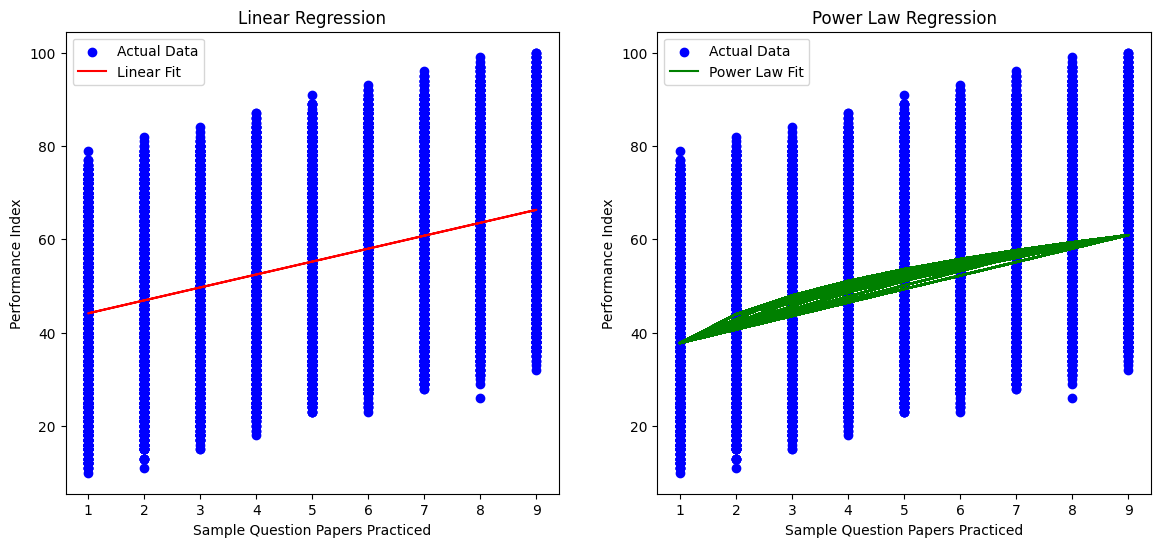

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import time

# Load data
data = pd.read_csv('Student_Performance.csv')

# Extract relevant columns
TB = data['Hours Studied'].values
NT = data['Performance Index'].values

# Model Linear (Metode 1)
def linear_regression(TB, NT):
    model = LinearRegression()
    TB = TB.reshape(-1, 1)
    model.fit(TB, NT)
    NT_pred = model.predict(TB)
    return model, NT_pred

# Model Pangkat Sederhana (Metode 2)
def power_law(TB, NT):
    # Transform data for linearization
    log_TB = np.log(TB)
    log_NT = np.log(NT)

    # Fit linear model to transformed data
    model = LinearRegression()
    log_TB = log_TB.reshape(-1, 1)
    model.fit(log_TB, log_NT)
    log_NT_pred = model.predict(log_TB)

    # Transform predictions back to original scale
    NT_pred = np.exp(log_NT_pred)
    return model, NT_pred

# Calculate RMS error
def calculate_rms_error(NT, NT_pred):
    return np.sqrt(mean_squared_error(NT, NT_pred))

# Plot results
def plot_results(TB, NT, NT_pred_linear, NT_pred_power):
    plt.figure(figsize=(14, 6))

    # Scatter plot of actual data
    plt.subplot(1, 2, 1)
    plt.scatter(TB, NT, color='blue', label='Actual Data')
    plt.plot(TB, NT_pred_linear, color='red', label='Linear Fit')
    plt.xlabel('Sample Question Papers Practiced')
    plt.ylabel('Performance Index')
    plt.title('Linear Regression')
    plt.legend()

    # Scatter plot of actual data
    plt.subplot(1, 2, 2)
    plt.scatter(TB, NT, color='blue', label='Actual Data')
    plt.plot(TB, NT_pred_power, color='green', label='Power Law Fit')
    plt.xlabel('Sample Question Papers Practiced')
    plt.ylabel('Performance Index')
    plt.title('Power Law Regression')
    plt.legend()

    plt.show()

# Run analysis
start_time = time.time()
linear_model, NT_pred_linear = linear_regression(TB, NT)
linear_time = time.time() - start_time
linear_rms_error = calculate_rms_error(NT, NT_pred_linear)

start_time = time.time()
power_model, NT_pred_power = power_law(TB, NT)
power_time = time.time() - start_time
power_rms_error = calculate_rms_error(NT, NT_pred_power)

# Print results
print(f"Linear Model RMS Error: {linear_rms_error}, Execution Time: {linear_time} seconds")
print(f"Power Law Model RMS Error: {power_rms_error}, Execution Time: {power_time} seconds")

# Plot results
plot_results(TB, NT, NT_pred_linear, NT_pred_power)
